In [1]:
import pandas as pd
df1=pd.read_csv("./multi-sentiment_explainlikeimfive_labelled.csv")
df2=pd.read_csv("./multi-sentiment_financialindependence_labelled.csv")
df3=pd.read_csv("./multi-sentiment_personalfinance_labelled.csv")


In [2]:
df=pd.concat([df1,df2,df3])
df

,Unnamed: 0,selftext,score,anger,anticipation,disgust,fear,joy,sadness,surprise,trust,label
0,0,mp material rare earth supplier u rare earth d...,0,158,55,141,108,67,58,57,110,anger
1,1,year coming close beginning near first kanye g...,2,108,414,216,278,105,151,50,186,anticipation
2,2,light weakening u s dollar japanese yen japane...,2,0,125,235,94,126,0,0,127,disgust
3,3,im day trading revolut app use drivewealth in ...,1,108,127,62,169,251,110,52,54,joy
4,4,curiousity hit google fidelity mutual fund spl...,3,157,289,65,62,194,59,0,457,trust
...,...,...,...,...,...,...,...,...,...,...,...,...
23233,23238,many year quicken shifted subscription model f...,1,0,114,123,94,162,0,0,157,joy
23234,23239,hello i old k account good life changing amoun...,1,293,164,186,201,185,124,0,113,anger
23235,23240,ive learning roth ira investing recently learn...,1,145,56,89,110,78,50,0,304,trust
23236,23241,long time reader first time home buyer credit ...,1,393,874,546,378,811,327,0,1902,trust


In [3]:
del df['Unnamed: 0']
df

,selftext,score,anger,anticipation,disgust,fear,joy,sadness,surprise,trust,label
0,mp material rare earth supplier u rare earth d...,0,158,55,141,108,67,58,57,110,anger
1,year coming close beginning near first kanye g...,2,108,414,216,278,105,151,50,186,anticipation
2,light weakening u s dollar japanese yen japane...,2,0,125,235,94,126,0,0,127,disgust
3,im day trading revolut app use drivewealth in ...,1,108,127,62,169,251,110,52,54,joy
4,curiousity hit google fidelity mutual fund spl...,3,157,289,65,62,194,59,0,457,trust
...,...,...,...,...,...,...,...,...,...,...,...
23233,many year quicken shifted subscription model f...,1,0,114,123,94,162,0,0,157,joy
23234,hello i old k account good life changing amoun...,1,293,164,186,201,185,124,0,113,anger
23235,ive learning roth ira investing recently learn...,1,145,56,89,110,78,50,0,304,trust
23236,long time reader first time home buyer credit ...,1,393,874,546,378,811,327,0,1902,trust


In [4]:
df=df.reset_index()


In [5]:
del df['index']

In [110]:
#remove stopwords
import nltk
from nltk.corpus import stopwords
#nltk.download("stopwords") #uncomment it when run it for the first time
stop_words = set(stopwords.words("english"))

def remove_stopwords(text):
    text = " ".join([word for word in text.split() if word not in stop_words])
    return text

stop_words.update({'would','k','im','could','also',
                   'amp','much','one','like',
                   'since','etc','got','always',
                   'know','wa','thing','really',
                   'feel','find','even','go','would','well','rfewqtuse',"eharth",'referal','earth','ed','code','send'
                  })
df['selftext']=df['selftext'].apply(lambda x: remove_stopwords(x))


In [108]:
df_word=pd.read_csv('EMOTION.csv')
df_word=df_word[df_word['emotion-intensity-score']>0.6]
len(df_word['word'])

3044

In [8]:
set(df_word.emotion)

{'anger',
 'anticipation',
 'disgust',
 'fear',
 'joy',
 'sadness',
 'surprise',
 'trust'}

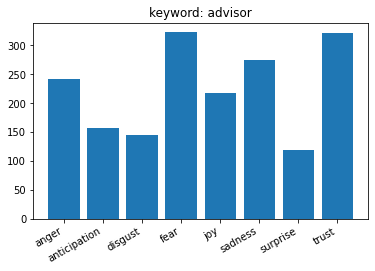

In [21]:
from collections import Counter
col = [x for x in df['selftext']]
text = str(col)

lower_case = text.lower()
# Removing punctuations
cleaned_text = lower_case.translate(str.maketrans('', '', string.punctuation))
tokenized_words = cleaned_text.split()
final_words = []
for word in tokenized_words:
    if word not in stop_words:
        final_words.append(word)
        

emotion_list = []
word=list(df_word.word)
emotion=list(df_word.emotion)

for i in range(len(df_word)):
    if word[i] in final_words:
        emotion_list.append(emotion[i])
            
w = Counter(emotion_list)
            
            
fig, ax1 = plt.subplots()
ax1.bar(w.keys(), w.values())
fig.autofmt_xdate()
plt.title('keyword: advisor')
plt.show()

In [40]:
def emo(tokens,emo):
    zip_iterator = zip(df_word.word, df_word.emotion)
    D= dict(zip_iterator)
    newDict = dict(filter(lambda x: x[1]== emo, D.items()))
    emotion_words=list(newDict.keys())
    
    List=list(itertools.chain(*tokens))
    
    result = []
    
    for word in List:
        if word in emotion_words:
            result.append(word)
    
    return result
            
    

In [46]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def wordcloud(wordlst):
    text = ' '.join (map(str, wordlst))

    wordcloud = WordCloud(width=1000, height=1000, margin=0,background_color='white',collocations=False).generate(text)

    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.margins(x=0, y=0)
    plt.show()

In [47]:
import nltk
import string

lower_case = df['selftext']
cleaned_text = lower_case.str.translate(str.maketrans('', '', string.punctuation))
tokens=cleaned_text.apply(lambda x: nltk.word_tokenize(x))
print(tokens)


0        [mp, material, rare, earth, supplier, u, rare,...
1        [year, coming, close, beginning, near, first, ...
2        [light, weakening, u, dollar, japanese, yen, j...
3        [day, trading, revolut, app, use, drivewealth,...
4        [curiousity, hit, google, fidelity, mutual, fu...
                               ...                        
30367    [many, year, quicken, shifted, subscription, m...
30368    [hello, old, account, good, life, changing, am...
30369    [ive, learning, roth, ira, investing, recently...
30370    [long, time, reader, first, time, home, buyer,...
30371    [currently, ltd, insurance, via, employer, cov...
Name: selftext, Length: 30372, dtype: object


In [44]:
anticipation = emo(tokens,'anticipation')

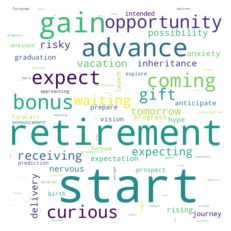

In [48]:
wordcloud(anticipation)

In [56]:
anticipation_df=df[df['label']=='anticipation']
anticipation_df

,selftext,score,anger,anticipation,disgust,fear,joy,sadness,surprise,trust,label
1,year coming close beginning near first kanye g...,2,108,414,216,278,105,151,50,186,anticipation
8,hi made post remote access bloomberg terminal ...,0,125,742,176,335,390,256,60,447,anticipation
9,huge drop reflex sony dropping title store per...,5,0,341,67,118,146,59,50,104,anticipation
10,gt tesla inc share roared record high eve incl...,56,269,294,137,234,275,229,123,188,anticipation
11,hey guy done actual dd concluded bft incredibl...,6,76,767,126,206,126,0,118,448,anticipation
...,...,...,...,...,...,...,...,...,...,...,...
30350,obvious risk market loss issue aware using rot...,1,158,360,151,322,127,225,0,162,anticipation
30351,live nj work ny state tax yesterday still owin...,1,0,237,0,62,150,115,0,51,anticipation
30352,stock high risk never went super crazy today t...,1,118,335,65,218,167,236,0,313,anticipation
30356,cp notice today tried looking seemed alot peop...,1,0,120,56,0,0,0,0,61,anticipation


In [103]:
#n-grams for anticipation
from nltk.util import ngrams
import itertools
import collections
def count_2gram(text):
    all_words = list(itertools.chain(*text.str.split()))
    es2grams = ngrams(all_words, 2)
    counts = collections.Counter(es2grams)
    count_df = pd.DataFrame(counts.most_common(100),
                            columns=['words', 'count'])
    dictionary2 = [' '.join(tup) for tup in count_df.words]
    count_df.words=dictionary2

    return count_df

count_df2=count_2gram(anticipation_df['selftext'])
count_df2.head(15)

,words,count
0,roth ira,1302
1,student loan,550
2,emergency fund,527
3,credit card,494
4,long term,456
5,saving account,444
6,next year,441
7,index fund,423
8,thanks advance,423
9,traditional ira,367


In [104]:
import plotly.express as px
fig1 = px.bar(count_df2.head(10), x='words', y='count', title="Top 10 words with emotion of anticipation",width=500)
fig1.show()

In [63]:
from sklearn.feature_extraction.text import TfidfVectorizer
#analyzer=‘char_wb’
def tfidfvectorizer(df):
    vec=TfidfVectorizer(min_df=0.01,stop_words='english',ngram_range=(2,3))
    counts=vec.fit_transform(df['selftext'])
    counts=counts.toarray()
    count_df1=pd.DataFrame(counts,columns=vec.get_feature_names())
    return count_df1

count_df1=tfidfvectorizer(anticipation_df)
count_df1

,backdoor roth,bank account,best option,best way,brokerage account,buy house,buying house,capital gain,capital gain tax,car loan,...,use money,want buy,want invest,want make,want start,working time,year ago,year old,year time,year year
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6134,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6135,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6136,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6137,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [64]:
from sklearn.decomposition import NMF

#n-components=number of topics
def nmf_topic(n_components,df):
    n=n_components
    model1=NMF(n_components=n,init="random",random_state=0)
    return model1.fit(df)

model1=nmf_topic(4,count_df1)
model1


NMF(init='random', n_components=4, random_state=0)

In [65]:
import numpy as np
def top_words(X, model, component, num_words):
    """
    Extract the top words from the specified component 
    for a topic model trained on data. 
    X: a term-document matrix, assumed to be a pd.DataFrame
    model: a sklearn model with a components_ attribute, e.g. NMF
    component: the desired component, specified as an integer. 
        Must be less than than the total number of components in model
    num_words: the number of words to return.
    """
    orders = np.argsort(model.components_, axis = 1)
    important_words = np.array(X.columns)[orders]
    return important_words[component][-num_words:]

In [113]:
#topic modeling for anticipation
topic1=pd.DataFrame({'Topic 0':top_words(count_df1, model1, 0, 10),
                   'Topic 1':top_words(count_df1, model1, 1, 10),
                   'Topic 2':top_words(count_df1, model1, 2, 10),
                   })
topic1

,Topic 0,Topic 1,Topic 2
0,make sense,make money,car loan
1,retirement account,saving account,year ago
2,ira contribution,pay tax,saving account
3,brokerage account,new job,year old
4,saving account,income tax,card debt
5,index fund,make sense,credit card debt
6,emergency fund,let say,credit score
7,backdoor roth,stock market,emergency fund
8,traditional ira,year old,student loan
9,roth ira,thanks advance,credit card


anticipation for:
topic0: Roth IRA and traditional IRA
topic1: tax and help with tax implication
topic2: funds and saving accounts
topic3: paying debts on cars and houses.

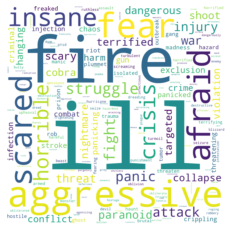

In [49]:
fear = emo(tokens,'fear')
wordcloud(fear)

In [68]:
#n-gram for fear
fear_df=df[df['label']=='fear']

count_df2=count_2gram(fear_df['selftext'])
count_df2.head(20)


,words,count
0,roth ira,409
1,credit card,232
2,student loan,196
3,year old,143
4,last year,132
5,interest rate,119
6,emergency fund,117
7,long term,116
8,credit score,109
9,next year,102


In [97]:
count_df2=count_2gram(fear_df['selftext'])
fig1 = px.bar(count_df2.head(10), x='words', y='count', title="Top 10 words with emotion of fear",width=500)
fig1.show()

In [116]:
#topic modeling for fear

count_df1=tfidfvectorizer(fear_df)
model1=nmf_topic(3,count_df1)
topic1=pd.DataFrame({'Topic 0':top_words(count_df1, model1, 0, 15),
                   'Topic 1':top_words(count_df1, model1, 1, 15),
                   'Topic 2':top_words(count_df1, model1, 2, 15)
                   })
topic1

,Topic 0,Topic 1,Topic 2
0,file tax,payment month,make year
1,capital gain,pay month,greatly appreciated
2,make year,pay debt,pay tax
3,new investing,monthly payment,student loan
4,index fund,saving account,mutual fund
5,past year,past year,thanks advance
6,thanks advance,bank account,long term
7,saving account,car loan,index fund
8,month ago,emergency fund,brokerage account
9,make sense,credit card debt,ira account


fear for:
topic0:credit card debt
topic1:car payment and student loan payment
topic3:roth ira

In [70]:
sadness_df=df[df['label']=='sadness']
#n-grams for sadness
count_df2=count_2gram(sadness_df['selftext'])
count_df2.head(20)

,words,count
0,credit card,203
1,roth ira,146
2,credit score,96
3,last year,71
4,student loan,65
5,long term,64
6,year ago,61
7,next year,55
8,missing something,49
9,tax return,47


In [98]:
count_df2=count_2gram(sadness_df['selftext'])
fig1 = px.bar(count_df2.head(10), x='words', y='count', title="Top 10 words with emotion of sadness",width=500)
fig1.show()

In [117]:
#topic modeling for sadness
sadness_df=df[df['label']=='sadness']

count_df1=tfidfvectorizer(sadness_df)
model1=nmf_topic(5,count_df1)
topic1=pd.DataFrame({'Topic 0':top_words(count_df1, model1, 0, 15),
                   'Topic 1':top_words(count_df1, model1, 1, 15),
                   'Topic 2':top_words(count_df1, model1, 2, 15),
                     'Topic 3':top_words(count_df1, model1, 3, 15),'Topic 4':top_words(count_df1, model1, 4, 15)                   })
topic1

,Topic 0,Topic 1,Topic 2,Topic 3,Topic 4
0,story short,car loan,saving account,past year,buy house
1,losing money,thanks advance,income tax,file tax,pay tax
2,greatly appreciated,past year,year old,month year,thanks advance
3,saving account,buy house,capital gain,month ago,car insurance
4,past year,dont want,year year,make sense,payment month
5,social security,greatly appreciated,tax return,new job,dont want
6,bank account,pay tax,tax year,real estate,auto loan
7,debit card,capital gain,pay tax,monthly payment,month ago
8,credit report,real estate,emergency fund,time job,car loan
9,credit union,make sense,contribute roth ira,dont want,collection agency


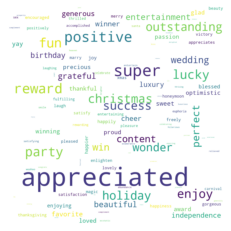

In [123]:
joy = emo(tokens,'joy')
wordcloud(joy)

sadness for:
topic0: credit card service and debt
topic1:file tax and self-employed tax
topic2:missing payment for collection agencies
topic3:roth ira and aging

In [77]:
joy_df=df[df['label']=='joy']

#n-grams for joy
count_df2=count_2gram(joy_df['selftext'])
count_df2.head(20)

,words,count
0,roth ira,248
1,credit card,204
2,student loan,151
3,index fund,147
4,saving account,141
5,year old,130
6,next year,129
7,last year,109
8,emergency fund,101
9,mutual fund,99


In [99]:
count_df2=count_2gram(joy_df['selftext'])
fig1 = px.bar(count_df2.head(10), x='words', y='count', title="Top 10 words with emotion of joy",width=500)
fig1.show()

In [22]:
#topic modeling for joy

count_df1=tfidfvectorizer(joy_df)
model1=nmf_topic(5,count_df1)
topic1=pd.DataFrame({'Topic 0':top_words(count_df1, model1, 0, 15),
                   'Topic 1':top_words(count_df1, model1, 1, 15),
                   'Topic 2':top_words(count_df1, model1, 2, 15),
                     'Topic 3':top_words(count_df1, model1, 3, 15),
                     'Topic 4':top_words(count_df1, model1, 4, 15),
                   })
topic1

,Topic 0,Topic 1,Topic 2,Topic 3,Topic 4
0,save money,let say,stock market,good idea,new job
1,make year,car insurance,family member,family member,hey guy
2,credit score,monthly payment,best way,debt free,putting money
3,real estate,house year,past year,make sense,income tax
4,buy house,make money,money year,long story,company match
5,bank account,debt free,make money,year year,greatly appreciated
6,make sense,new year,year year,long term,pre tax
7,help appreciated,appreciated thanks,appreciated thanks,real estate,emergency fund
8,year ago,car loan,invest money,money market,pay tax
9,emergency fund,pay month,advice appreciated,investment account,brokerage account


joy for:
topic0:make money and pay debts
topic1:age and monthly payments
topic2:family and long-term invest
topic3:job matching and roth ira
topic4:investing and money saving

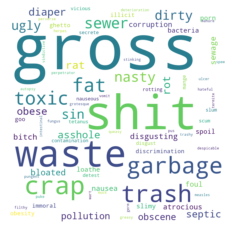

In [51]:
disgust = emo(tokens,'disgust')
wordcloud(disgust)

In [79]:
disgust_df=df[df['label']=='disgust']

#n-grams for disgust
count_df2=count_2gram(disgust_df['selftext'])
count_df2.head(20)

,words,count
0,roth ira,430
1,interest rate,269
2,credit card,135
3,credit score,121
4,closing cost,116
5,monthly payment,108
6,long term,96
7,year old,90
8,student loan,90
9,next year,84


In [100]:
count_df2=count_2gram(disgust_df['selftext'])
fig1 = px.bar(count_df2.head(10), x='words', y='count', title="Top 10 words with emotion of disgust",width=500)
fig1.show()

In [24]:
#topic modeling for disgust

count_df1=tfidfvectorizer(disgust_df)
model1=nmf_topic(5,count_df1)
topic1=pd.DataFrame({'Topic 0':top_words(count_df1, model1, 0, 15),
                   'Topic 1':top_words(count_df1, model1, 1, 15)
                   })
topic1

,Topic 0,Topic 1
0,couple year,best option
1,past year,mortgage company
2,stock market,good idea
3,buy house,past year
4,year mortgage,hey guy
5,best option,car loan
6,mortgage rate,month ago
7,pay month,credit union
8,low rate,buy house
9,thanks advance,looking buy


disgust for:
topic0: mortgage company and mortgage rate
topic1: other topics(for disgust, mortgage rates and buying house is the most obvious topic, and the other topics doesn't make strong sense)

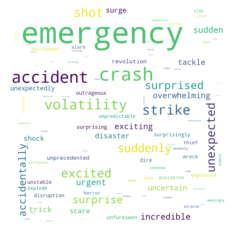

In [52]:
surprise = emo(tokens,'surprise')
wordcloud(surprise)

In [82]:
surprise_df=df[df['label']=='surprise']

#n-grams for surprise
count_df2=count_2gram(surprise_df['selftext'])
count_df2.head(20)

,words,count
0,credit card,15
1,saving account,9
2,student loan,7
3,year ago,6
4,traditional ira,6
5,direct deposit,6
6,roth ira,5
7,last month,5
8,last year,5
9,couple year,5


In [101]:
count_df2=count_2gram(surprise_df['selftext'])
fig1 = px.bar(count_df2.head(10), x='words', y='count', title="Top 10 words with emotion of surprise",width=500)
fig1.show()

In [26]:
#topic modeling for surprise
count_df1=tfidfvectorizer(disgust_df)
model1=nmf_topic(5,count_df1)
topic1=pd.DataFrame({'Topic 0':top_words(count_df1, model1, 0, 15)})
topic1

,Topic 0
0,couple year
1,past year
2,stock market
3,buy house
4,year mortgage
5,best option
6,mortgage rate
7,pay month
8,low rate
9,thanks advance


surprise for:
topic0: lower mortgage rate and buy house
(text labelled as surprise is not as many as those labelled other tags)

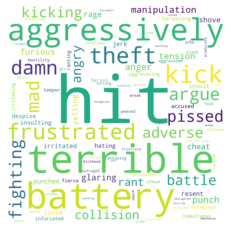

In [53]:
anger = emo(tokens,'anger')
wordcloud(anger)

In [111]:
anger_df=df[df['label']=='anger']

#n-grams for anger
count_df2=count_2gram(anger_df['selftext'])
count_df2.head(20)

,words,count
0,brokerage account,99
1,roth ira,86
2,credit card,81
3,year old,49
4,index fund,46
5,long term,44
6,year ago,41
7,student loan,39
8,next year,38
9,last year,38


In [112]:
count_df2=count_2gram(anger_df['selftext'])
fig1 = px.bar(count_df2.head(10), x='words', y='count', title="Top 10 words with emotion of anger",width=500)
fig1.show()

In [28]:
#topic modeling for anger

count_df1=tfidfvectorizer(anger_df)
model1=nmf_topic(3,count_df1)
topic1=pd.DataFrame({'Topic 0':top_words(count_df1, model1, 0, 15),
                   'Topic 1':top_words(count_df1, model1, 1, 15),
                   'Topic 2':top_words(count_df1, model1, 2, 15)})
topic1

,Topic 0,Topic 1,Topic 2
0,past year,couple year,dont want
1,thanks advance,thanks advance,couple year
2,want buy,monthly payment,best way
3,new investing,insurance company,index fund
4,make sense,debit card,hey guy
5,couple year,best way,past year
6,year ago,bank account,covid hit
7,year old,month ago,short term
8,traditional ira,dont want,buy house
9,saving account,credit report,credit report


anger for:
topic0: insurance company and banks
topic1: loans and time(year ago)
topic2: brokerage account(special for this sentiment)

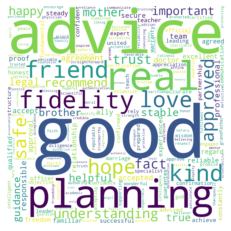

In [54]:
trust = emo(tokens,'trust')
wordcloud(trust)

In [86]:
trust_df=df[df['label']=='trust']

#n-grams for trust
count_df2=count_2gram(trust_df['selftext'])
count_df2.head(20)

,words,count
0,credit card,2999
1,roth ira,1895
2,credit score,1586
3,student loan,1523
4,interest rate,1108
5,saving account,1051
6,year old,1013
7,long term,1009
8,next year,941
9,last year,846


In [102]:
count_df2=count_2gram(trust_df['selftext'])
fig1 = px.bar(count_df2.head(10), x='words', y='count', title="Top 10 words with emotion of trust",width=500)
fig1.show()

In [120]:
#topic modeling for trust

count_df1=tfidfvectorizer(trust_df)
model1=nmf_topic(7,count_df1)
topic1=pd.DataFrame({'Topic 0':top_words(count_df1, model1, 0, 15),
                   'Topic 1':top_words(count_df1, model1, 1, 15),
                   'Topic 2':top_words(count_df1, model1, 2, 15),
                    'Topic 3':top_words(count_df1, model1, 3, 15),
                    'Topic 4':top_words(count_df1, model1, 4, 15),
                    'Topic 5':top_words(count_df1, model1, 5, 15),
                    'Topic 6':top_words(count_df1, model1, 6, 15)})
topic1

,Topic 0,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6
0,loan credit,credit card debt,health insurance,retirement saving,month ago,car payment,invest money
1,thanks advance,pay debt,mutual fund,employer match,social security,loan credit,long time
2,build credit,card debt,brokerage account,investment account,health insurance,good credit,make money
3,monthly payment,make year,good idea,pre tax,save money,pay month,year year
4,month ago,pay loan,stock market,emergency fund,greatly appreciated,car loan,brokerage account
5,personal loan,year ago,index fund,pay tax,year year,personal loan,year ago
6,credit union,car payment,debit card,make sense,time job,checking account,mutual fund
7,car loan,emergency fund,thanks advance,thanks advance,college student,credit report,past year
8,collection agency,buy house,year ago,mutual fund,index fund,credit history,make sense
9,buy house,car loan,credit union,retirement account,stock market,bank account,capital gain


trust for:
topic0:credit report and credit history
topic1:health insurance and social security
topic2:accounts and funds
topic3:car and student loans debt
topic4:good credit score